In [ ]:
# TODO: Libreta apra analizar y comprender los resultados btenidos con POVME

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Directorio donde están guardados los resultados de POVME
dir_volumen_results = '../ARCHIVOS/CRISTALES/VOLUMEN/CDK2_VOL_RICCI_402/res_frameInfo/'

In [31]:
# Ejemplo del pocket en un solo frame
# Resultado povme para un frame (1-index)
frame_1_povme = np.load(F'{dir_volumen_results}/res_frame_1.npy')
frame_1_povme.shape

(887, 3)

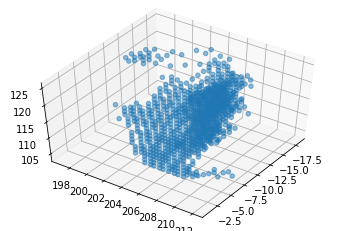

In [32]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
frame_1_povme = frame_1_povme.T
ax.scatter3D(frame_1_povme[0], frame_1_povme[1], frame_1_povme[2], alpha = 0.5)
ax.view_init(50, 35)

In [33]:
# Extracción de resultados y generación de matrices binarias

In [34]:
# Lista de archivos .npy con información de los puntos (archivos npy generales, se omiten los colores)
frame_files_list = glob.glob(F'{dir_volumen_results}/res_frame_*[0-9].npy')
# Los ordenamos alfanuméricamente
# Un quilombo la parte del split, pero básicamente se asegura de ordenar los archivos
frame_files_list.sort(key = lambda x : int( (x.split('res_frame_')[-1].replace('.', '_').split('_')[0] ) ))

In [35]:
allPointsSet = set() # Set con todos los posibles puntos
pointsSetList = [] # Lista de puntos por frame
for file in frame_files_list:
    # Se carga el arreglo de puntos dim(n, 3), 
    # donde n es variable según los puntos que aparezcan en cada frame
    pointsSet = set([tuple(i) for i in np.load(file)])
    # Añade los puntos del frame i a la lista
    pointsSetList.append(pointsSet)
    # Set de todos los posibles puntos, se añaden nuevos puntos si es que los hay
    allPointsSet = allPointsSet.union(pointsSet)
    # np.array(list(allPointsSet)).shape

# Se crea un vector donde la llave es la tupla de las coordenadas del punto
# y el valor es el número de punto de los N posibles puntos
coord2vectPos = dict([(coord, i) for i, coord in enumerate(allPointsSet)])
#vectPos2Coord = dict([(i, coord) for i, coord in enumerate(allPointsSet)])

nVectPos = len(allPointsSet) # Número total de posibles puntos
nFrames = len(frame_files_list) # Número de frames o conformaciones

# Matriz de puntos, incializada en ceros, donde las filas corresponden a un vector de N puntos
# True (1): si la conformación tiene un punto en esa posición
vecPosMatrix = np.zeros((nFrames, nVectPos), dtype=np.bool)
# iteramos por cada frame
for f1 in range(nFrames):
    # Iteramos por cada punto del frame f1
    for point in pointsSetList[f1]:
        # Si el punto está en la conformación, se añade un 1
        vecPosMatrix[f1, coord2vectPos[point]] = 1

In [36]:
# Matriz de datos que será pasada por PCA o al gún método de reducción dimensional
vecPosMatrix.shape

(402, 2742)

In [37]:
# guardamos la matriz
np.save('./B_DATOS/povme_402_crys_pocket_points', vecPosMatrix)